# Gaussian Mixture Model

Consider a set of data containing a mixture of $K$ 1d-gaussians with different $\mu_k$ and $\sigma_k$. Each $\mu_k$ follows some normal distribution with some variance and denote $c_i$ as the particular gaussian that the i-th particle comes from, which is modeled as Dirichlet distribution with some fixed parameter $\alpha$.  
Mathematically, 

\begin{gather*}
\mu_k \sim \mathcal{N}(0, s^2) \\
c_i \sim Dir(\pi|\alpha) \\
x_i|\mathbf{\mu}, c_i \sim \mathcal{N}(\mathbf{c}^T\mathbf{\mu}, \mathbf{\sigma})
\end{gather*}

Let's visualize the data.

In [105]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

class gaussian_mixture_model_1d:
    def __init__(self):
        self.mixtures = dict()
        self.samples = dict()

    def add_gaussian(self, mean, sigma):
        model = stats.multivariate_normal(mean, cov=sigma)
        self.mixtures[(mean,sigma)] = model
    
    def draw_sample(self, sizes):
        if isinstance(sizes, int):
            sizes = [sizes]
        sizes = list(sizes)
        
        while len(sizes) < len(self.mixtures):
            sizes.append(sizes[-1])
        
        for i, (key, model) in enumerate(self.mixtures.items()):
            self.samples[key] = model.rvs(size = sizes[i])

        return self.samples


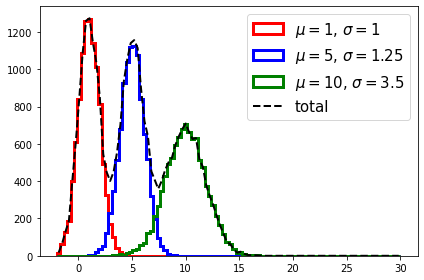

In [107]:
gmm = gaussian_mixture_model_1d()
gmm.add_gaussian(1, 1)
gmm.add_gaussian(5, 1.25)
gmm.add_gaussian(10, 3.5)
datum  = gmm.draw_sample(10000)

fig, ax = plt.subplots()
obs_data = np.empty(0)
colors = ['r', 'b', 'g']
for i, (key, data) in enumerate(datum.items()):
    ax.hist(data, range=(-2,30), bins=100, histtype = 'step', label=r'$\mu={mean}$, $\sigma={var}$'.format(mean=key[0],var=key[1]), color=colors[i], linewidth=3)
    obs_data = np.concatenate((obs_data, data))

hist, edges = np.histogram(obs_data, range=(-2,30), bins=100)
x = 0.5 * (edges[1:] + edges[:-1])
ax.errorbar(x, y=hist, fmt='k--', label='total', linewidth=2,)
plt.legend(fontsize=15)
plt.tight_layout()

As seen from the figure, the data we can observe would be the sum of the gaussian distributions. If these gaussians are close then we could not distinguish them from being one gaussian or a mixture of gaussian. Our goal, as usual, is to calculate the posterior given the data. The problem would be as easy as one single gaussian if we know which gaussian each data point comes from. In reality we don't, thus we need to introduce the latent variables.

## Mean field Variational inference for GMM
First, we need to verify that GMM satisfy conditional conjugacy. The  